# Build a type-2 inference system

This tutorial explains how to build a type-2 inference system.
The reader is assumed to be familiar with the basic syntax to build a fuzzy system, which
is described in the Build a Mamdani inference system tutorial.

DOWNLOAD_NOTE

## Interval membership function

While a normal membership function associates each element of a fuzzy set ot a membership
degree $\mu \in [0, 1]$, an interval membership function associates each element to an
*interval membership degeee* $\overline{\mu}\subseteq[0, 1]$.

The following example shows how to contruct an interval membership function in the library
and displays the result.

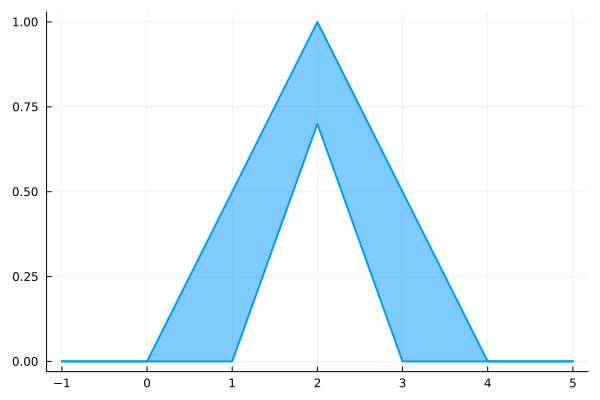

In [1]:
using FuzzyLogic, Plots

mf = 0.7 * TriangularMF(1, 2, 3) .. TriangularMF(0, 2, 4)

plot(mf, -1, 5)

An interval membership function can be constructed using the `..` operator. The left input
is the lower bound and the right input is the upper bound. The expression `0.5 * TriangularMF(1, 2, 3)`
constructs a scaled membership.

## Type-2 inference systems

A type-2 Mamdani system can be built with the `@mamfis` macro, just like type-1, with two differences

- membership functions can be interval membership funcions
- the defuzzifier should be one of the Type-2 defuzzifiers

The following code shows an example of building a type-2 system and performing inference with it.

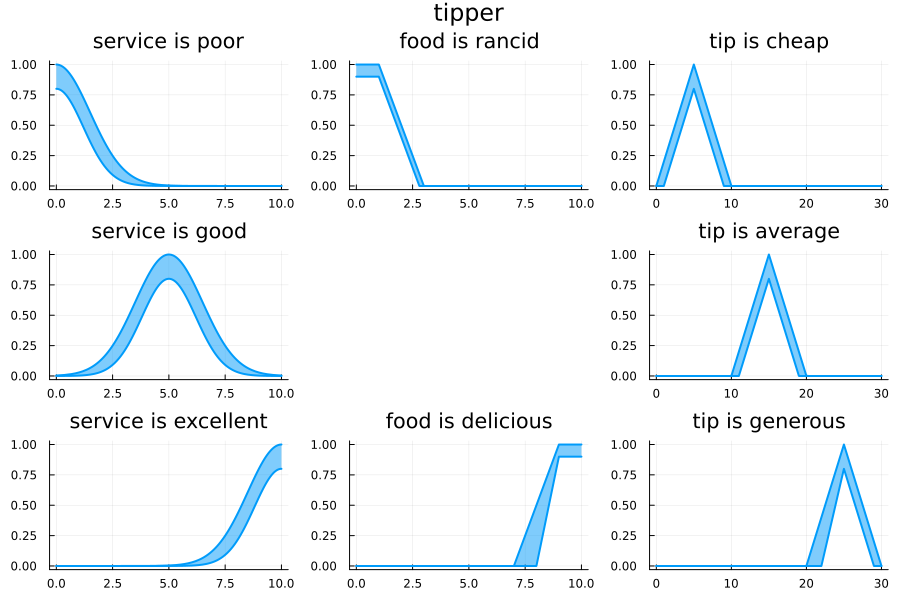

In [2]:
fis = @mamfis function tipper(service, food)::tip
    service := begin
        domain = 0:10
        poor = 0.8 * GaussianMF(0.0, 1.2) .. GaussianMF(0.0, 1.5)
        good = 0.8 * GaussianMF(5.0, 1.2) .. GaussianMF(5.0, 1.5)
        excellent = 0.8 * GaussianMF(10.0, 1.2) .. GaussianMF(10.0, 1.5)
    end

    food := begin
        domain = 0:10
        rancid = 0.9 * TrapezoidalMF(-1.8, 0.0, 1.0, 2.8) .. TrapezoidalMF(-2, 0, 1, 3)
        delicious = 0.9 * TrapezoidalMF(8, 9, 10, 12) .. TrapezoidalMF(7, 9, 10, 12)
    end

    tip := begin
        domain = 0:30
        cheap = 0.8 * TriangularMF(1, 5, 9) .. TriangularMF(0, 5, 10)
        average = 0.8 * TriangularMF(11, 15, 19) .. TriangularMF(10, 15, 20)
        generous = 0.8 * TriangularMF(22, 25, 29) .. TriangularMF(20, 25, 30)
    end

    service == poor || food == rancid --> tip == cheap
    service == good --> tip == average
    service == excellent || food == delicious --> tip == generous

    defuzzifier = KarnikMendelDefuzzifier()
end

plot(fis)

In [3]:
fis(service = 2, food = 3)

1-element Dictionaries.Dictionary{Symbol, Float64}
 :tip │ 7.500432748035022